## Binary classifier - Logistic

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
import random
import math

random.seed(123)

df = pd.read_csv('utils/C_npf_train.csv')
Y = df['class2']
df = df.drop(['class4', 'class2'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size=0.25, random_state=0)

## Multi-label classifier - Logistic

In [134]:
# initialize model
params = dict({'multi_class': 'multinomial', 'n_jobs': -1})
logReg = LogisticRegression(**params)

# feature selection
# using 10-fold cross-validation
logReg_rfecv = RFECV(
  estimator=logReg,
  step=1,
  cv=10,
  scoring="accuracy",
  min_features_to_select=1
)
logReg_rfecv.fit(x_train, y_train)

RFECV(cv=10, estimator=LogisticRegression(multi_class='multinomial', n_jobs=-1),
      scoring='accuracy')

0.8695652173913043


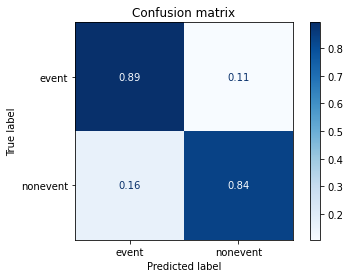

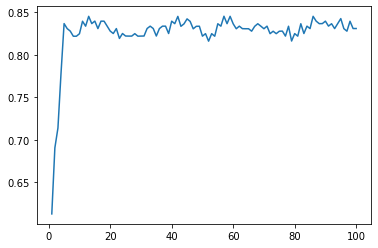

In [135]:
# plotting interediate results
acc = logReg_rfecv.score(x_test, y_test)
print(acc)

conf = plot_confusion_matrix(logReg_rfecv, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix')
plt.show(conf)
plt.show()

plt.plot(
    range(1, len(logReg_rfecv.grid_scores_) + 1),
    logReg_rfecv.grid_scores_,
)

In [136]:
#best features
df_fe = df.loc[: , logReg_rfecv.support_]
x_trainfe, x_testfe, y_trainfe, y_testfe = train_test_split(df_fe, Y, test_size=0.25, random_state=0)
logReg_rfecv.n_features_

57

In [137]:
# tuning hyper parameters
search_space = dict(
  {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
  'penalty': ['l1', 'l2', 'elasticnet'],
  'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
  })

tuner = RandomizedSearchCV(logReg, search_space, scoring='accuracy', cv=10, n_jobs=-1)
logReg_param = tuner.fit(x_trainfe, y_trainfe)

C:\Users\Adiel\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.84277311 0.83647059 0.80756303 0.84277311        nan
 0.84563025 0.84277311 0.83680672 0.83680672]
  warnings.warn(
C:\Users\Adiel\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


best parameters {'solver': 'saga', 'penalty': 'l1', 'C': 0.5}
accuracy 0.8695652173913043
perplecity 2.6139033774527154


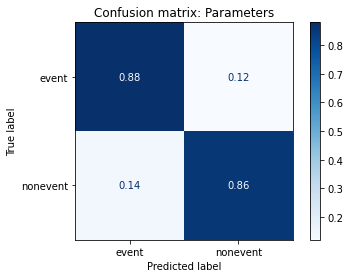

In [138]:
print("best parameters", logReg_param.best_params_)

acc = logReg_param.score(x_testfe, y_testfe)
print("accuracy", acc)

perp = math.exp((-sum(logReg_param.predict_log_proba(x_testfe)[:,0])) / len(y_testfe))
print("perplecity", perp)

conf_param = plot_confusion_matrix(logReg_param, x_testfe, y_testfe,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix: Parameters')
plt.show(conf_param)
plt.show()

In [139]:
res_df = pd.DataFrame({
  "predicted probabilities": logReg_param.predict_proba(x_testfe)[:,0],
  "predicted labels" : logReg_param.predict(x_testfe),
  "true labels" :y_testfe
})
res_df

,predicted probabilities,predicted labels,true labels
164,0.945228,event,event
229,0.315812,nonevent,nonevent
311,0.034999,nonevent,nonevent
221,0.511797,event,event
122,0.619561,event,nonevent
...,...,...,...
252,0.104118,nonevent,nonevent
135,0.505466,event,event
7,0.939236,event,event
246,0.093807,nonevent,nonevent


In [140]:
#false cases
res_df[res_df["predicted labels"] != res_df["true labels"]]

,predicted probabilities,predicted labels,true labels
122,0.619561,event,nonevent
219,0.653123,event,nonevent
220,0.813524,event,nonevent
90,0.249325,nonevent,event
171,0.275883,nonevent,event
225,0.570190,event,nonevent
428,0.189580,nonevent,event
124,0.408953,nonevent,event
200,0.736236,event,nonevent
198,0.341014,nonevent,event
